## Predictions based on past data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('USA_Housing.csv')

In [5]:
#show columns names
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
#rename columns
data.rename(columns=
    {'Avg. Area Income' : 'median_income',
    'Avg. Area House Age' : 'house_age',
    'Avg. Area Number of Rooms' : 'rooms',
    'Avg. Area Number of Bedrooms': 'bedrooms'},
    inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   median_income    5000 non-null   float64
 1   house_age        5000 non-null   float64
 2   rooms            5000 non-null   float64
 3   bedrooms         5000 non-null   float64
 4   Area Population  5000 non-null   float64
 5   Price            5000 non-null   float64
 6   Address          5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 312.5+ KB


In [15]:
#summary stats
data.describe()

,median_income,house_age,rooms,bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


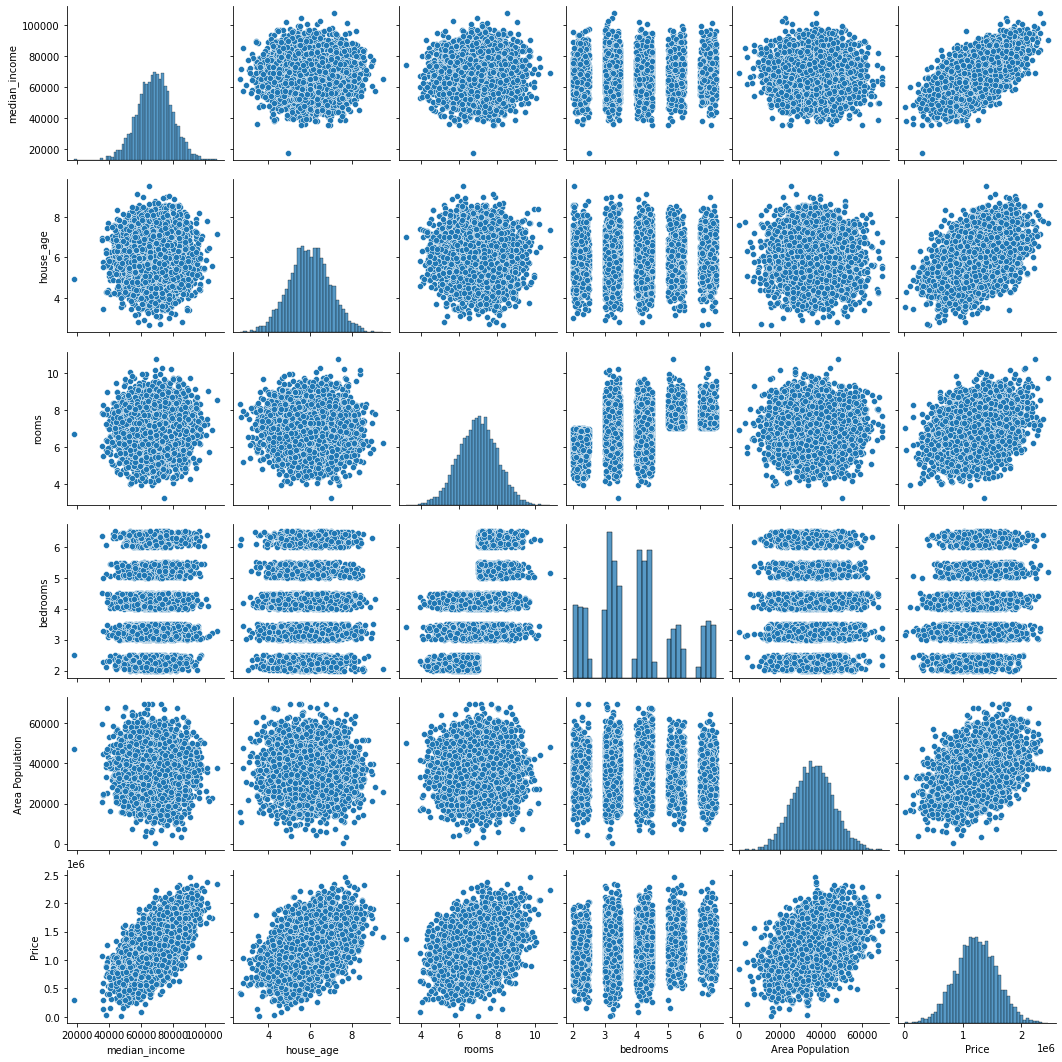

In [16]:
#pairplots for the columns
sns.pairplot(data)

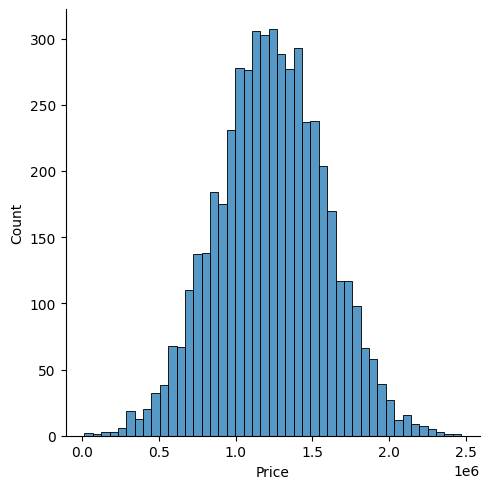

In [17]:
#view a frequency distribution of my target column (what I am trying to predict = price)
sns.displot(data['Price'])

In [18]:
#show correlation between variables
data.corr()

,median_income,house_age,rooms,bedrooms,Area Population,Price
median_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
house_age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

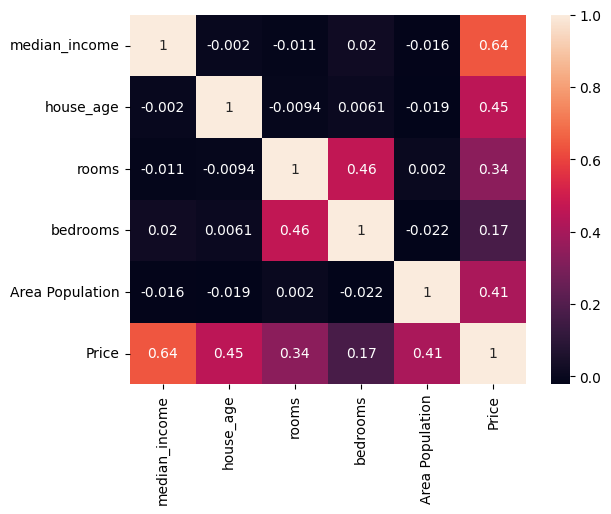

In [20]:
#show a heat map
sns.heatmap(data.corr(), annot= True)

In [21]:
data.columns

Index(['median_income', 'house_age', 'rooms', 'bedrooms', 'Area Population',
       'Price', 'Address'],
      dtype='object')

## Build your predictive model

In [26]:
#1. split the dataset into features and target value

X = data[['median_income', 'house_age', 'rooms', 'bedrooms', 'Area Population']]
y = data['Price']

In [27]:
#2. split data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.4, random_state=101)

In [28]:
#3. build the linear regression model

from sklearn.linear_model import LinearRegression

#create an instance of LinearRegression class
lm = LinearRegression()

#train my model ony my training data
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
#check that the lienar has been built correctly
lm.intercept_

-2640159.7968526958

In [30]:
#check the coefficients
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [32]:
#4. create a dataframe of coefficients
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coeff'])
cdf

,Coeff
median_income,21.528276
house_age,164883.282027
rooms,122368.678027
bedrooms,2233.801864
Area Population,15.150420


## Making Prediction Using our Model

In [33]:
predictions = lm.predict(X_test)

In [34]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140898, 1914519.5417888 ])

In [35]:
predictions.shape

(2000,)

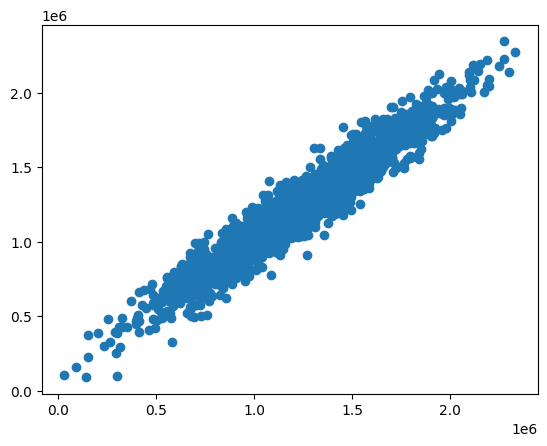

In [36]:
#compare predictions with actual values
plt.scatter(y_test, predictions)

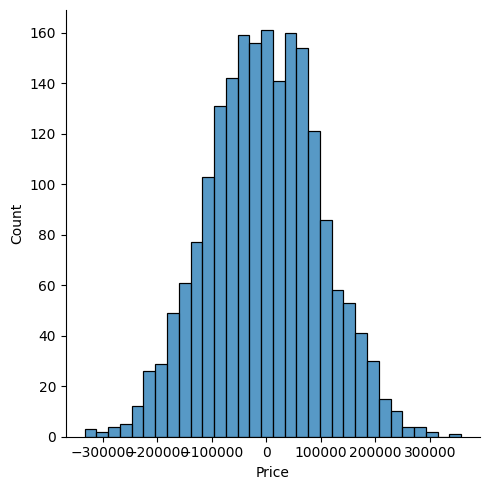

In [37]:
#Check the distribution of the differences (between predicted and actual)
sns.displot(y_test - predictions)

In [ ]:
#How to improve a model ?
#more data
#more features, differentes features, combining features, etc